Preparation to load data by API

In [1]:
!pip install kaggle


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ------------------------ 30.7/82.7 kB 93.5 kB/s eta 0:00:01
     -------------- ------------------------ 30.7/82.7 kB 93.5 kB/s eta 0:00:01
     -------------- ------------------------ 30.7/82.7 kB 93.5 kB/s eta 0:00:01
     -------------- ------------------------ 30.7/82.7 kB 93.5 kB/s eta 0:00:01
     -------------- -


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


La syntaxe de la commande n'est pas correcte.


'cp' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'chmod' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Load data

In [ ]:
#Api fetch dataset from kaggle
! kaggle datasets download -d kazanova/sentiment140

In [4]:
#extract dataset
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#print stopwords in english
print(stopwords.words('english'))
#doesnt required and doesnt influce the model

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**pre_processing**

In [9]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [10]:
df.shape

(1599999, 6)

In [11]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [13]:
#name the column
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=['sentiment','id','date','query','user','tweet'],encoding='ISO-8859-1')

In [14]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
twitter_data.shape

(1600000, 6)

In [16]:
twitter_data['sentiment'].unique() #0 negative and 4 positive

array([0, 4])

In [17]:
#number of missing value
twitter_data.isnull().sum()

,0
sentiment,0
id,0
date,0
query,0
user,0
tweet,0


In [18]:
#distrubition target
twitter_data['sentiment'].value_counts()


,count
sentiment,
0,800000
4,800000


In [19]:
#convert 4 to 1
twitter_data['sentiment']=twitter_data['sentiment'].replace(4,1)
#ou
#twitter_data['sentiment'].replace({'sentiment':{4:1}},inplace=True)

In [20]:
twitter_data['sentiment'].value_counts()

,count
sentiment,
0,800000
1,800000


1:😀 and  0:😠

In [21]:
#stemming
port_stem=PorterStemmer()
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content) #removing all content not alphabet
  stemmed_content=stemmed_content.lower() #convert to all lowercase
  stemmed_content=stemmed_content.split() #splitting of coontent in words in list
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #removing stopped words end stemming
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [22]:
twitter_data['tweet']=twitter_data['tweet'].apply(stemming)

In [23]:
twitter_data.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav mad see


In [24]:
print(twitter_data['tweet'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: tweet, Length: 1600000, dtype: object


**Splitting**

In [25]:
x=twitter_data['tweet'].values
y=twitter_data['sentiment'].values

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [27]:
x_test.shape

(320000,)

In [28]:
x_train.shape

(1280000,)

In [29]:
#converting text data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(x)

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [30]:
print(x_train)

  (0, 436713)	0.2725987626483838
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.1870933868497303
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.20289715703997938
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.44569393722995737
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277746
  (1279996, 434014)	0.2718945052332447
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.3521250099983204
  (1279996, 238077)

**Train model**

In [31]:
model=LogisticRegression(max_iter=1000)

In [37]:
# Train the model and save the training history
history = model.fit(x_train, y_train)

**Model evaluating**

In [38]:
y_pred=model.predict(x_train)

In [39]:
training_data_accuracy=accuracy_score(y_pred,y_train)

In [40]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.79871953125


In [41]:
test_data_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.77668125


In [46]:
training_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, test_data_prediction)

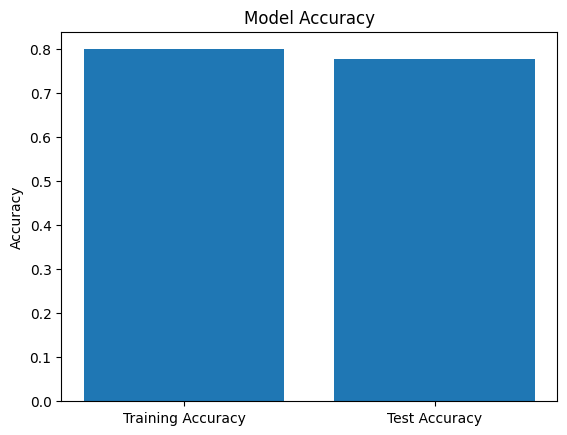

In [47]:
# Create a bar plot
plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

**save-model**

In [48]:
import pickle
file_name='tweet_sentiment.pkl'
pickle.dump(model,open(file_name,'wb'))